In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:


file='train.csv'
df_train=pd.read_csv(file)
df_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
#cleaning 

In [6]:
#find percentage of missing values in columns
perct = df_train.isnull().sum()/df_train.shape[0] *100
perct[perct!=0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [7]:
print(perct[perct>70])
#percentage of features that are mssing values over 70%

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [8]:
#dropping columns with missing values over 70%
df_train.drop(["Alley", "PoolQC", "Fence", "MiscFeature"],axis = 1, inplace = True )

In [9]:
#need to impute to solve the missing data problem 

In [10]:
miss_val_col = df_train.columns[df_train.isnull().any()]
print(df_train[miss_val_col].dtypes)
miss_cat_col = df_train[miss_val_col].select_dtypes(include = 'object').columns

# Impute each missing value in categorical feature with most freq value
for each_col in miss_cat_col:
    df_train[each_col] = df_train[each_col].fillna(df_train[each_col].mode()[0])

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object


In [11]:
#checking to see what else is missing
cols = df_train.isnull().sum()
cols[cols>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
#imputing mean to cover missing data 
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean())
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())

In [13]:
#checking to see what else is missing
cols = df_train.isnull().sum()
cols[cols>0]

Series([], dtype: int64)

In [14]:
#handling catagorical variables 

In [15]:
catergorical_cols = df_train.select_dtypes(include = 'object').columns
catergorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
# using 1 hot encoding on all the categorical features 

In [17]:

def one_hot_encode(cols):
    data1 = big_dataset
    i = 0
    
    for each_col in cols:
        print(each_col)
        df = pd.get_dummies(big_dataset[each_col], drop_first = True)
        big_dataset.drop([each_col], axis = 1, inplace = True)
        
        if i==0:
            data1 = df.copy()
        else:
            data1 = pd.concat([data1, df], axis = 1)
        i = i + 1
        
    data1 = pd.concat([data1, big_dataset], axis = 1)
    
    return(data1)



In [18]:
# pd.get_dummies(data["MSZoning"], drop_first = True).head(4)

In [19]:
#time to combine test and train to include all features

In [20]:

test_df = pd.read_csv("test.csv")

big_dataset = pd.concat([df_train, test_df], axis = 0)
big_dataset.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Alley,PoolQC,Fence,MiscFeature
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500.0,NaN,NaN,NaN,NaN
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500.0,NaN,NaN,NaN,NaN
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500.0,NaN,NaN,NaN,NaN
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000.0,NaN,NaN,NaN,NaN
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000.0,NaN,NaN,NaN,NaN


In [21]:
big_dataset.shape

(2919, 81)

In [22]:
big_dataset = one_hot_encode(list(catergorical_cols))

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [23]:
big_dataset.shape 

(2919, 242)

In [24]:
big_dataset = big_dataset.loc[:,~big_dataset.columns.duplicated()]
big_dataset.shape

(2919, 182)

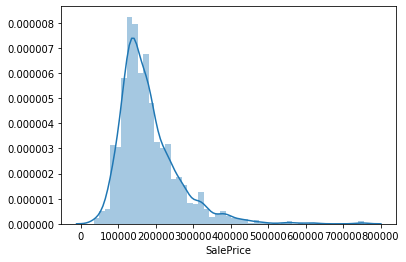

In [25]:
sns.distplot(big_dataset['SalePrice']);
#observation = deviates from normal distribution, skews positively, 

In [26]:
#skewness and kurtosis
print("Skewness: %f" % big_dataset['SalePrice'].skew())
print("Kurtosis: %f" % big_dataset['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [27]:
# using scatter plots to see relationship between sales price and numeric variables

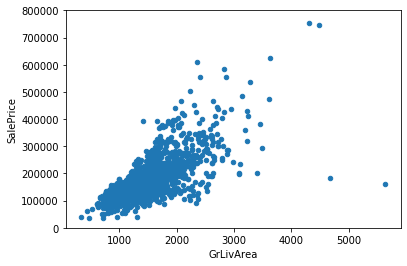

In [28]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([big_dataset['SalePrice'], big_dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [29]:
#looks like the relationship is linear 

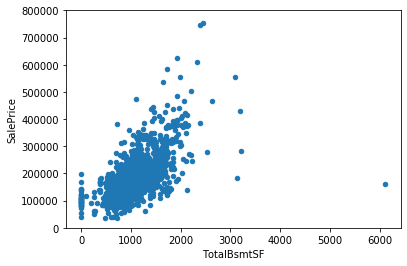

In [30]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([big_dataset['SalePrice'], big_dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

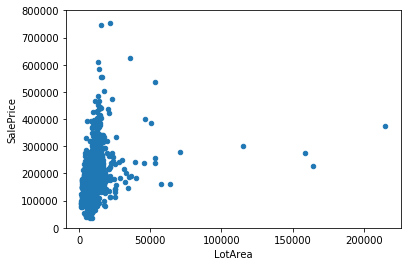

In [31]:
var = 'LotArea'
data = pd.concat([big_dataset['SalePrice'], big_dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [32]:
#looks like an exponential relationship 

In [33]:
#relationships with categorical features 

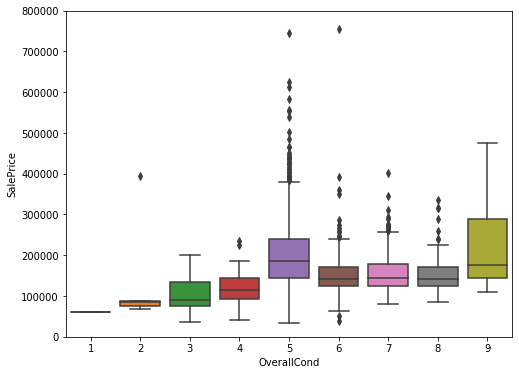

In [34]:
#box plot OverallCond/saleprice 
var = 'OverallCond'
data = pd.concat([big_dataset['SalePrice'], big_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

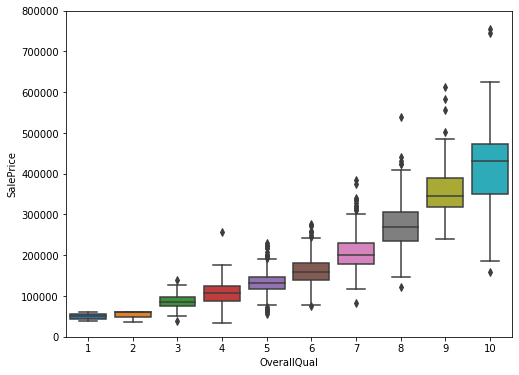

In [35]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([big_dataset['SalePrice'], big_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

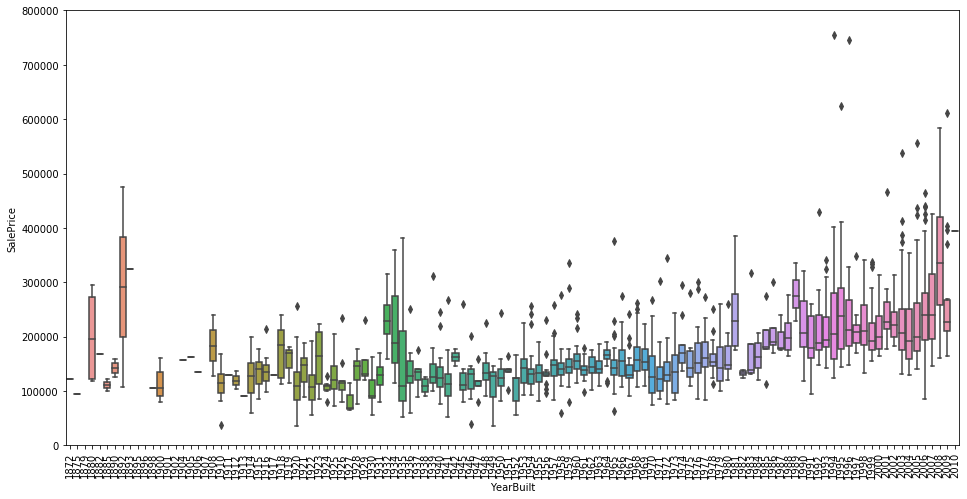

In [36]:
#seeing what the relationship between sale price and the year built. 

var = 'YearBuilt'
data = pd.concat([big_dataset['SalePrice'], big_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);



In [37]:
#will continue further when eda portion comes up. 

In [38]:
# Ana, since there a lot of features in this project, 
#are there any other variables that you think I should explore ? 